# Acknowledgement

This notebook is from the kaggle intro to Machine learning.

Added manula avaluation and condest to use train test spit and evaluation in one notebook.


# Selecting Data for Modeling
Your dataset had  too many variables to wrap your head around, or even to print out nicely.  How can you pare down this overwhelming amount of data to something you can understand?

We'll start by picking a few variables using our intuition. Later courses will show you statistical techniques to automatically prioritize variables.

To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the **columns** property of the DataFrame (the bottom line of code below).


In [13]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [5]:
melbourne_file_path = "data/melb_data.csv"
melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.
# Your Iowa data doesn't have missing values in the columns you use.
# So we will take the simplest option for now, and drop houses from our data.
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

There are many ways to select a subset of your data. The [Pandas course](https://www.kaggle.com/learn/pandas) covers these in more depth, but we will focus on two approaches for now.

1. Dot notation, which we use to select the "prediction target"
2. Selecting with a column list, which we use to select the "features" 

## Selecting The Prediction Target 
You can pull out a variable with **dot-notation**.  This single column is stored in a **Series**, which is broadly like a DataFrame with only a single column of data.  

We'll use the dot notation to select the column we want to predict, which is called the **prediction target**. By convention, the prediction target is called **y**. So the code we need to save the house prices in the Melbourne data is

<Axes: >

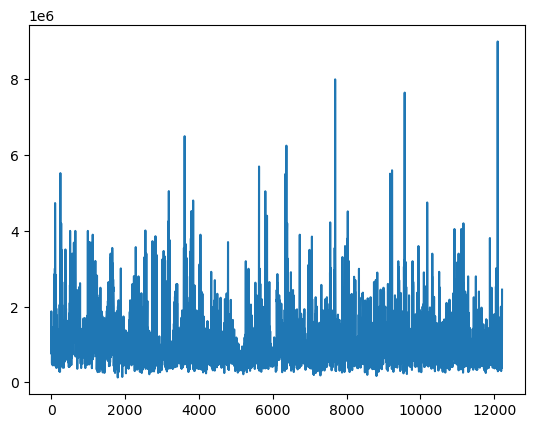

In [7]:
y = melbourne_data.Price
y.plot()

# Choosing "Features"
The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features. 

For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

Here is an example:

In [8]:
melbourne_features = ["Rooms", "Bathroom", "Landsize", "Lattitude", "Longtitude"]

By convention, this data is called **X**.

In [9]:
X = melbourne_data[melbourne_features]

Let's quickly review the data we'll be using to predict house prices using the `describe` method and the `head` method, which shows the top few rows.

In [10]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [11]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


Visually checking your data with these commands is an important part of a data scientist's job.  You'll frequently find surprises in the dataset that deserve further inspection.

---
# Building Your Model

You will use the **scikit-learn** library to create your models.  When coding, this library is written as **sklearn**, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames. 

The steps to building and using a model are:
* **Define:** What type of model will it be?  A decision tree?  Some other type of model? Some other parameters of the model type are specified too.
* **Fit:** Capture patterns from provided data. This is the heart of modeling.
* **Predict:** Just what it sounds like
* **Evaluate**: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [14]:
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
# Define model
melbourne_model = tree.DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

DecisionTreeRegressor()

Many machine learning models allow some randomness in model training. Specifying a number for `random_state` ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.


## Model Evaluation

In [15]:
# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)

print(mean_absolute_error(val_y, val_predictions))

271360.41790402407


 As a point of reference, the average home value in the validation data is 1.1 million dollars. So the error in new data is about a quarter of the average home value.

There are many ways to improve this model, such as experimenting to find better features or different model types.


Now try out the model with some data you want

In [16]:
rooms = 5
bathroom = 1
landsize = 30.0
lattitude = -36
longitude = 144.9944

melbourne_model.predict(np.array([[rooms, bathroom, landsize, lattitude, longitude]]))

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([492000.])

Note here that you need the pass in the data as pandas dataframe or a nested numpy array.

[Text(0.6349931136776589, 0.9821428571428571, 'x[0] <= 3.5\nsquared_error = 425983862677.153\nsamples = 4647\nvalue = 1061265.388'),
 Text(0.35649371421834253, 0.9464285714285714, 'x[0] <= 2.5\nsquared_error = 202866829802.248\nsamples = 3431\nvalue = 887252.604'),
 Text(0.16187317889514682, 0.9107142857142857, 'x[2] <= 83.5\nsquared_error = 91817099154.228\nsamples = 1538\nvalue = 677877.916'),
 Text(0.06155752846339101, 0.875, 'x[0] <= 1.5\nsquared_error = 39728996019.096\nsamples = 665\nvalue = 544954.382'),
 Text(0.02403646032433718, 0.8392857142857143, 'x[2] <= 80.5\nsquared_error = 13550090555.92\nsamples = 161\nvalue = 394841.925'),
 Text(0.023818989610676453, 0.8035714285714286, 'x[3] <= -37.797\nsquared_error = 11444382722.559\nsamples = 160\nvalue = 391153.438'),
 Text(0.017056160112812933, 0.7678571428571429, 'x[4] <= 145.041\nsquared_error = 12679502003.196\nsamples = 118\nvalue = 409657.203'),
 Text(0.009395414426123669, 0.7321428571428571, 'x[2] <= 66.5\nsquared_error = 1

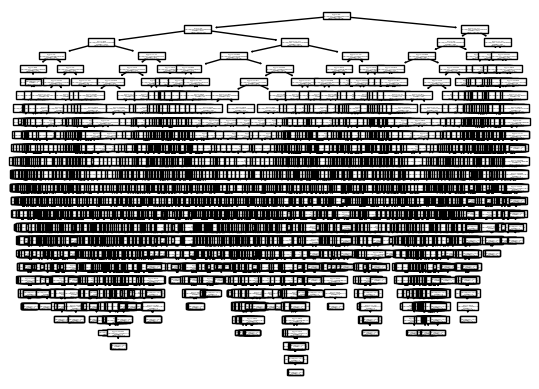

In [18]:
tree.plot_tree(melbourne_model)